In [11]:
import os
dataset_path = '/kaggle/input/rice-image-classification-dataset/Rice_Image_Dataset'
print(os.listdir(dataset_path))

['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']


In [12]:
import os
print(os.listdir("/kaggle/input"))

['rice-image-classification-dataset']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from keras.preprocessing.image import load_img
import os
import zipfile

In [16]:
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [20]:
src_dir = "/kaggle/input/rice-image-classification-dataset/Rice_Image_Dataset"

In [21]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    src_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=1
)

validation_generator = validation_datagen.flow_from_directory(
    src_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=1
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


In [23]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)

In [25]:
x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='swish')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)

x = tf.keras.layers.Conv2D(128, 3, padding='same', activation='swish')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)

x = tf.keras.layers.Conv2D(256, 3, padding='same', activation='swish')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding='same')(x)

x = tf.keras.layers.Conv2D(512, 3, padding='same', activation='swish')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 64)            │         737,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1, 1, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,342,504 (24.19 MB)

 Trainable params: 2,291,013 (8.74 MB)

 Non-trainable params: 4,051,491 (15.46 MB)

In [27]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/model_checkpoint.keras', save_best_only=False, monitor='val_loss', mode='min', save_freq='epoch')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=7, restore_best_weights=True, verbose=1)


In [28]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[checkpoint_cb, reduce_lr, early_stopping])

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1040s 539ms/step - accuracy: 0.9142 - loss: 0.2679 - val_accuracy: 0.9790 - val_loss: 0.0599 - learning_rate: 1.0000e-04
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 719s 382ms/step - accuracy: 0.9728 - loss: 0.0863 - val_accuracy: 0.9873 - val_loss: 0.0368 - learning_rate: 1.0000e-04
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 728s 387ms/step - accuracy: 0.9782 - loss: 0.0685 - val_accuracy: 0.9899 - val_loss: 0.0359 - learning_rate: 1.0000e-04
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 694s 369ms/step - accuracy: 0.9810 - loss: 0.0559 - val_accuracy: 0.9919 - val_loss: 0.0234 - learning_rate: 1.0000e-04
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 690s 367ms/step - accuracy: 0.9829 - loss: 0.0533 - val_accuracy: 0.9948 - val_loss: 0.0183 - learning_rate: 1.0000e-04
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 840s 447ms/step - accuracy: 0.9852 - loss: 0.0456 - val_accuracy: 0.9911 - val_loss: 0.0262 - learning_rate: 1.0000e-04
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━

In [29]:
import os
print(os.listdir("/kaggle/working/"))

['.virtual_documents', 'model_checkpoint.keras']


In [2]:
import os
print(os.listdir("/kaggle/input/"))

['rice-image-classification-dataset']


In [37]:
import os

checkpoint_files = sorted([f for f in os.listdir("/kaggle/working/") if f.startswith("model_checkpoint_") and f.endswith(".keras")])

print("Checkpoints found:")
for file in checkpoint_files:
    print(file)

print(f"Total checkpoints saved: {len(checkpoint_files)}")


Checkpoints found:
Total checkpoints saved: 0


In [38]:
checkpoints = [f for f in os.listdir(checkpoint_dir) if f.startswith('model_checkpoint') and f.endswith('.keras')]
print(f"Total epochs saved: {len(checkpoints)}")

Total epochs saved: 1


In [39]:
from tensorflow.keras.models import load_model

checkpoint_path = "/kaggle/working/model_checkpoint.keras"
model = load_model(checkpoint_path)
print("Model loaded successfully!")

Model loaded successfully!


In [40]:
import os

checkpoint_files = sorted([f for f in os.listdir("/kaggle/working/") if f.startswith("model_checkpoint_") and f.endswith(".keras")])

if checkpoint_files:
    latest_checkpoint = checkpoint_files[-1]  
    print(f"Latest checkpoint found: {latest_checkpoint}")
    
    epoch_number = int(latest_checkpoint.split("_")[-1].split(".")[0])
    print(f"Resume training from epoch: {epoch_number + 1}")  
else:
    print("No checkpoints found. Start training from epoch 1.")


No checkpoints found. Start training from epoch 1.


In [41]:
history = model.fit(train_generator, 
                    epochs=30,  
                    initial_epoch=12, 
                    validation_data=validation_generator,
                    callbacks=[checkpoint_cb, reduce_lr, early_stopping])

Epoch 13/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 769s 399ms/step - accuracy: 0.9793 - loss: 0.0607 - val_accuracy: 0.9801 - val_loss: 0.0604 - learning_rate: 2.5000e-05
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 778s 413ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9851 - val_loss: 0.0446 - learning_rate: 2.5000e-05
Epoch 15/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 744s 395ms/step - accuracy: 0.9906 - loss: 0.0303 - val_accuracy: 0.9864 - val_loss: 0.0434 - learning_rate: 2.5000e-05
Epoch 16/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 705s 375ms/step - accuracy: 0.9908 - loss: 0.0269 - val_accuracy: 0.9857 - val_loss: 0.0468 - learning_rate: 2.5000e-05
Epoch 17/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 726s 386ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9896 - val_loss: 0.0354 - learning_rate: 2.5000e-05
Epoch 18/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 765s 407ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9901 - val_loss: 0.0376 - learning_rate: 2.5000e-05
Epoch 19/30
1875/1875 

In [42]:
from tensorflow.keras.models import load_model

checkpoint_path = "/kaggle/working/model_checkpoint.keras"  
model = load_model(checkpoint_path)
print("Model loaded successfully!")

Model loaded successfully!


In [73]:
model.save('/kaggle/working/model_efficientnet_rice.keras')
print("Model saved as .keras format")

Model saved as .keras format


In [58]:
loss, accuracy = model.evaluate(validation_generator)  
print(f"Final Model Accuracy: {accuracy * 100:.2f}%")
print(f"Final Model Loss: {loss:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9870 - loss: 0.0525
Final Model Accuracy: 99.22%
Final Model Loss: 0.0292


In [54]:
print("Evaluating on validation data...")
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

Evaluating on validation data...
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step


In [55]:
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

     Arborio       0.99      0.98      0.99      3000
     Basmati       1.00      0.99      1.00      3000
      Ipsala       0.99      1.00      1.00      3000
     Jasmine       0.99      0.99      0.99      3000
   Karacadag       0.99      1.00      0.99      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



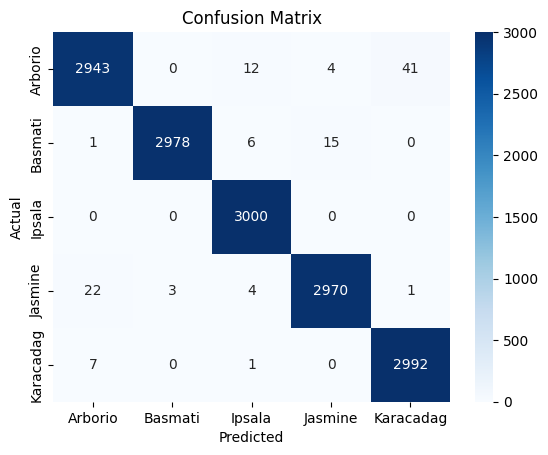

In [56]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [59]:
correct_predictions = np.trace(conf_matrix)
incorrect_predictions = np.sum(conf_matrix) - correct_predictions
print(f"Correct Predictions: {correct_predictions}")
print(f"Incorrect Predictions: {incorrect_predictions}")

Correct Predictions: 14883
Incorrect Predictions: 117


Enter the number of predictions to display:  10


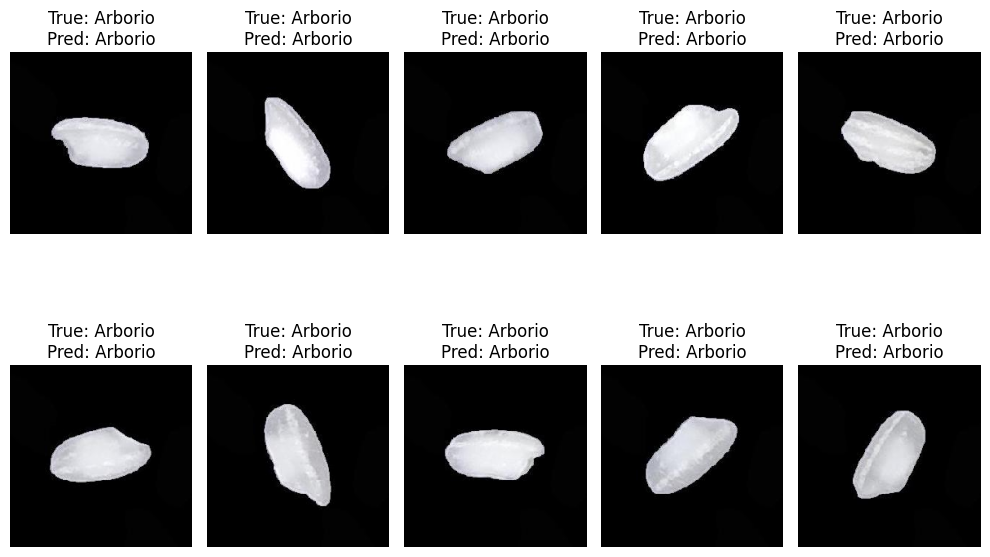

In [60]:
num_to_display = int(input("Enter the number of predictions to display: "))
plt.figure(figsize=(10, 10))
for i in range(num_to_display):
    plt.subplot((num_to_display // 5) + 1, 5, i + 1)
    img_path = validation_generator.filepaths[i]
    img = load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
plt.tight_layout()
plt.show()

Enter the indices of images to predict (comma-separated):  12546


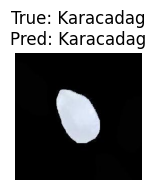

In [66]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

indices = list(map(int, input("Enter the indices of images to predict (comma-separated): ").split(',')))

plt.figure(figsize=(10, len(indices) * 2))
for i, idx in enumerate(indices):
    if idx >= len(validation_generator.filepaths): 
        print(f"Index {idx} is out of range. Skipping...")
        continue

    img_path = validation_generator.filepaths[idx]
    img = load_img(img_path, target_size=(224, 224))

    plt.subplot(len(indices), 1, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_labels[true_classes[idx]]}\nPred: {class_labels[predicted_classes[idx]]}")

plt.tight_layout()
plt.show()

In [69]:
from IPython.display import FileLink

FileLink('/kaggle/working/model_efficientnet_rice.keras')

/kaggle/working/model_efficientnet_rice.keras

In [71]:
import os

print(os.listdir('/kaggle/working/'))

['model_checkpoint.h5', '.virtual_documents', 'model_checkpoint.keras', 'model_efficientnet_rice.keras']


In [72]:
for root, dirs, files in os.walk('/kaggle/working/'):
    for file in files:
        print(os.path.join(root, file))

/kaggle/working/model_checkpoint.h5
/kaggle/working/model_checkpoint.keras
/kaggle/working/model_efficientnet_rice.keras
